# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [5]:
#import the libraries
import pandas as pd 
import numpy as np 


In [6]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("googleplaystore_v2.csv")
inp0.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [8]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [9]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [10]:
#Drop the rows having null values in the Rating field
inp1 = inp0[~inp0.Rating.isnull()]
inp1

#Check the shape of the dataframe
inp1.shape

(9367, 13)

In [11]:
# Check the number of nulls in the Rating field again to cross-verify
inp1["Rating"].isnull().sum()

0

In [12]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [13]:
#Inspect the nulls in the Android Version column
inp1[inp1["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
#Drop the row having shifted values
inp1=inp1[~(inp1["Android Ver"].isnull()&(inp1["Category"]=="1.9"))]
inp1[inp1["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [15]:
#Check the most common value in the Android version column
inp1.groupby('Android Ver').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver
Android Ver,,,,,,,,,,,,
1.0 and up,2,2,2,2,2,2,2,2,2,2,2,2
1.5 and up,16,16,16,16,16,16,16,16,16,16,16,15
1.6 and up,87,87,87,87,87,87,87,87,87,87,87,87
2.0 and up,27,27,27,27,27,27,27,27,27,27,27,27
2.0.1 and up,7,7,7,7,7,7,7,7,7,7,7,7
2.1 and up,113,113,113,113,113,113,113,113,113,113,113,113
2.2 and up,208,208,208,208,208,208,208,208,208,208,208,208
2.3 and up,582,582,582,582,582,582,582,582,582,582,582,582
2.3.3 and up,240,240,240,240,240,240,240,240,240,240,240,240


In [16]:
inp1['Android Ver'].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [17]:
inp1['Android Ver'].mode()[0]

'4.1 and up'

In [18]:
#Fill up the nulls in the Android Version column with the above value
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

In [19]:
#Check the nulls in the Android version column again to cross-verify
inp1['Android Ver'].value_counts()
inp1['Android Ver'].isnull().sum()

0

In [20]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [21]:
#Check the most common value in the Current version column
inp1["Current Ver"].value_counts()

Current Ver
Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [22]:
#Replace the nulls in the Current version column with the above value
inp1[~inp1["Current Ver"].isnull()]
inp1["Current Ver"] = inp1["Current Ver"].fillna(inp1['Current Ver'].mode()[0])


In [23]:
# Question : Check the most common value in the Current version column again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [24]:
""" inp1[inp1['Content Rating'].isnull()]
inp1['Content Rating']=inp1['Content Rating'].mode()[0]
inp1.isnull().sum()
inp1["Current Ver"].value_counts() """

' inp1[inp1[\'Content Rating\'].isnull()]\ninp1[\'Content Rating\']=inp1[\'Content Rating\'].mode()[0]\ninp1.isnull().sum()\ninp1["Current Ver"].value_counts() '

#### Handling Incorrect Data Types 

In [25]:
#Check the datatypes of all the columns 
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [26]:
#Question - Try calculating the average price of all apps having the Android version as "4.1 and up" 

inp1=inp1[~(inp1['Price'] == 'Everyone')]
inp1['Price'] = inp1['Price'].str.replace('$','')
inp1['Price'] = inp1['Price'].astype(float)
inp1.groupby(['Android Ver']).agg({'Price': np.average})
#inp1.pivot_table(['Price'],['Android Ver'],aggfunc=np.average)

,Price
Android Ver,
1.0 and up,0.000000
1.5 and up,0.871250
1.6 and up,5.463448
2.0 and up,0.257407
2.0.1 and up,1.921429
2.1 and up,0.529292
2.2 and up,1.069519
2.3 and up,0.392165
2.3.3 and up,0.444708


In [27]:
#Analyse the Price column to check the issue

inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [28]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [29]:
#Write the function to make the changes


#inp1['Price'] = inp1['Price'].str.replace('$','')
inp1['Price'] = inp1['Price'].astype(float)
inp1['Price'].value_counts()

Price
0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: count, Length: 73, dtype: int64

In [30]:
#Verify the dtype of Price once again
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [31]:
#Analyse the Reviews column
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [32]:
#Change the dtype of this column
inp1['Reviews']=inp1['Reviews'].astype(int)

#Check the quantitative spread of this dataframe



In [33]:
#Analyse the Installs Column
inp1['Installs'].head()


0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [34]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
inp1['Installs'] = inp1['Installs'].str.replace(',','').str.replace('+','').astype(int)


In [35]:
inp1['Installs'].describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [36]:
#Perform the sanity checks on the Reviews column review shouls not be gretter than installs
inp1[(inp1['Reviews'] > inp1['Installs'])]
inp1 = inp1[(inp1['Reviews'] <= inp1['Installs'])]
inp1[(inp1['Reviews'] > inp1['Installs'])].shape

(0, 13)

In [37]:
#perform the sanity checks on prices of free apps price should not be more than 0
inp1[(inp1['Price'] > 0) & (inp1['Type']=='Free') ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [38]:
""" As you saw in the video, three essential sanity checks were performed on the data:

Rating is between 1 and 5 for all the apps.
Number of Reviews is less than or equal to the number of Installs.
Free Apps shouldn’t have a price greater than 0.

The first and third conditions were satisfied, whereas the second condition was not satisfied with some records. 
When you inspected those records, you realised that those apps were likely junk apps and therefore you should ideally remove those records.
 As mentioned, you are free to apply sanity checks to the dataset on your own as long as they’re logically sound.  """

' As you saw in the video, three essential sanity checks were performed on the data:\n\nRating is between 1 and 5 for all the apps.\nNumber of Reviews is less than or equal to the number of Installs.\nFree Apps shouldn’t have a price greater than 0.\n\nThe first and third conditions were satisfied, whereas the second condition was not satisfied with some records. \nWhen you inspected those records, you realised that those apps were likely junk apps and therefore you should ideally remove those records.\n As mentioned, you are free to apply sanity checks to the dataset on your own as long as they’re logically sound.  '

#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [39]:
#import the plotting libraries
import matplotlib.pyplot as plt
inp1['Price'].describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

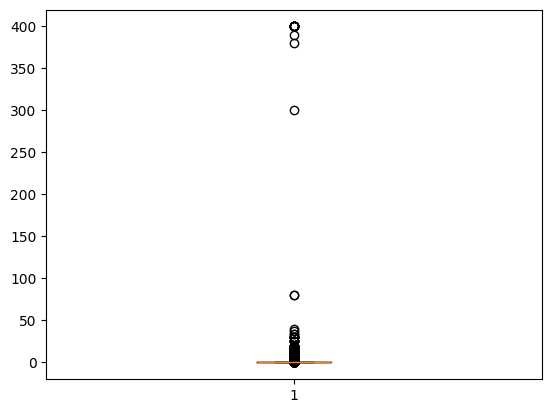

In [40]:
#Create a box plot for the price column
plt.boxplot(inp1["Price"])
plt.show()

In [41]:
#Check the apps with price more than 200
inp1[(inp1["Price"] > 200)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [42]:
#Clean the Price column
inp1 = inp1[(inp1["Price"] < 200)]
inp1["Price"].describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

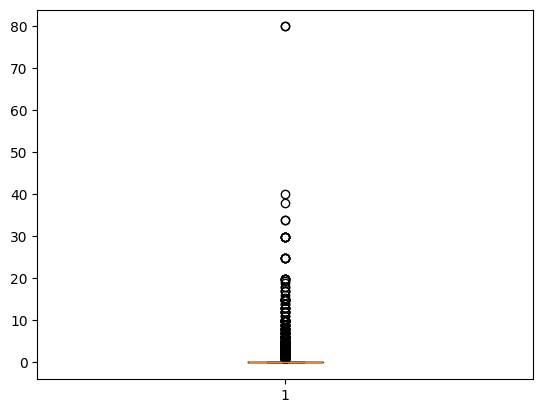

In [43]:
#Create a box plot for paid apps

plt.boxplot(inp1["Price"])
plt.show()

<Axes: >

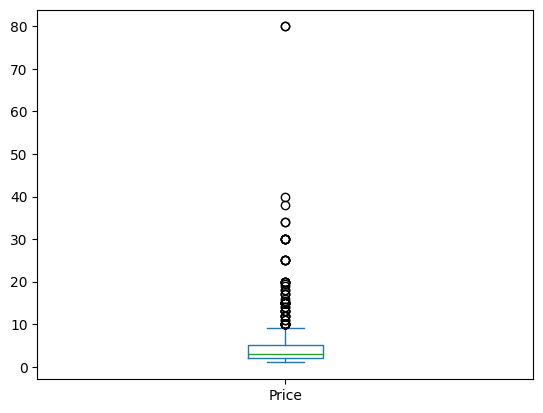

In [44]:
#Check the apps with price more than 0 as we know most of the app are with price 0
#we are using pandas feature to plot which calls matplotlib feature.
inp1[(inp1["Price"] > 0)]["Price"].plot.box()

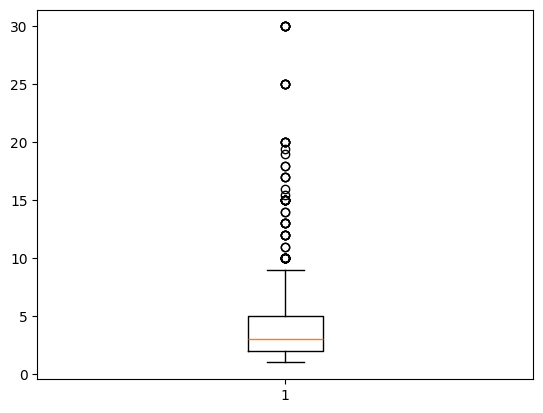

In [45]:
#Clean the Price column again as we see price more than 30 is all outlier 
inp1 = inp1[(inp1["Price"] < 30)]
inp1["Price"].describe()
plt.boxplot(inp1[(inp1["Price"] > 0)]["Price"])
plt.show()

In [46]:
# Finally, you were left with 9338 records.
#So, the two major takeaways from outlier analysis are as follows:

#Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately.
#Use a boxplot to observe, analyse and remove them.
#In the former case, you should determine whether or not removing them would add value to your analysis procedure.
#In this segment, the focus was on detecting outliers. In the next segment, let's visualise the distribution using histograms.  

 

#Additional Notes:

#Several definitions exist for outliers for different contexts so that the correct procedure is followed for removing them. 
#You can go through this link for more information.
#Box plots are utilised not just for outlier analysis, but can also be used to compare a certain numeric variable across different categories.
# You’ll learn about this method in the next session where we start analysing the data for insights using Seaborn.

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

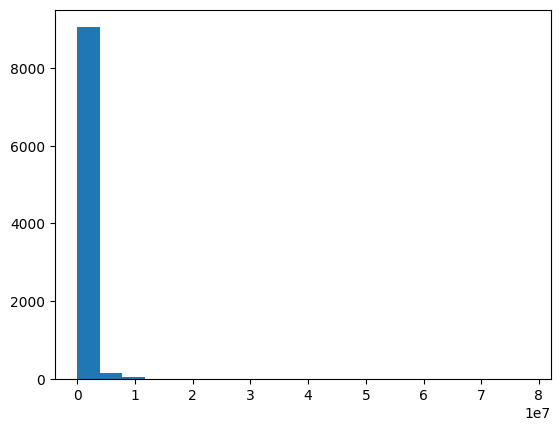

In [47]:
#Create a histogram of the Reviews
plt.hist(inp1["Reviews"],bins=20)
plt.show()

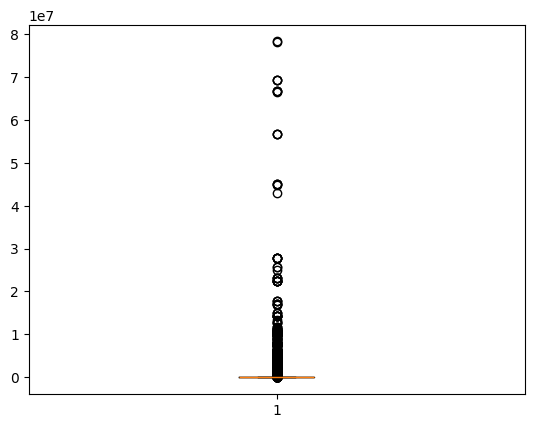

In [48]:
#Create a boxplot of the Reviews column
plt.boxplot(inp1["Reviews"])
plt.show()

In [49]:
#Check records with 1 million reviews
inp1[inp1["Reviews"] >= 10000000]
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [50]:
#Drop the above records

inp1=inp1[inp1["Reviews"]<=10000000]

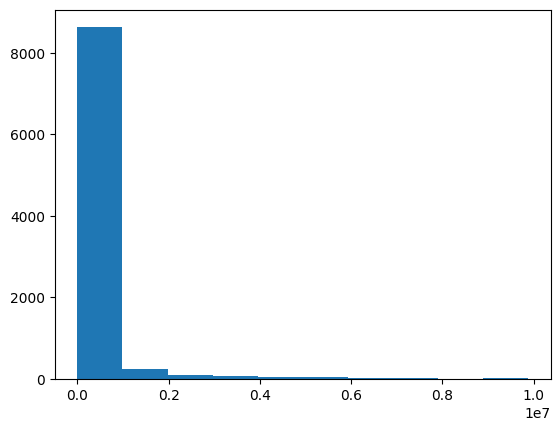

In [51]:
#Question - Create a histogram again and check the peaks

plt.hist(inp1["Reviews"])
plt.show()

count    9.246000e+03
mean     1.303561e+07
std      6.865554e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

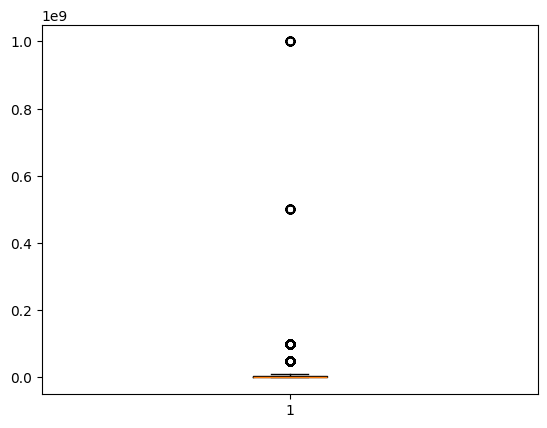

In [52]:
#Question - Create a box plot for the Installs column and report back the IQR

plt.boxplot(inp1["Installs"])

inp1.Installs.describe()


In [53]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs

inp1 = inp1[inp1.Installs <= 100000000]
inp1.shape

(9177, 13)

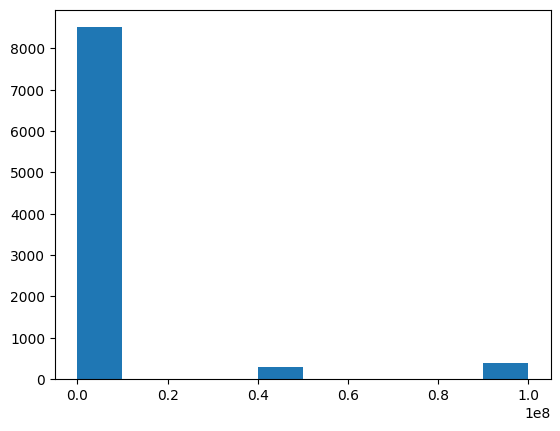

In [54]:
#Plot a histogram for Size as well.
plt.hist(inp1["Installs"])
plt.show()

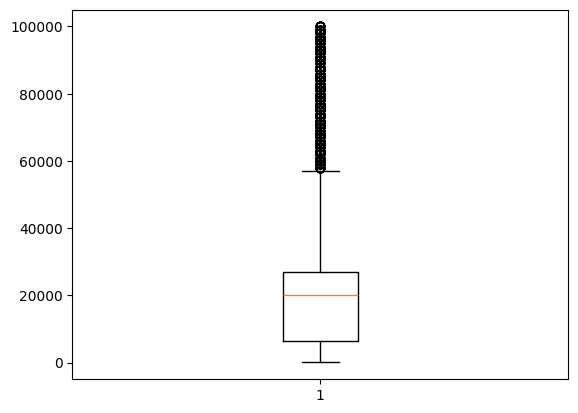

In [55]:
#Question - Create a boxplot for the Size column and report back the median value
plt.boxplot(inp1["Size"])
plt.show()

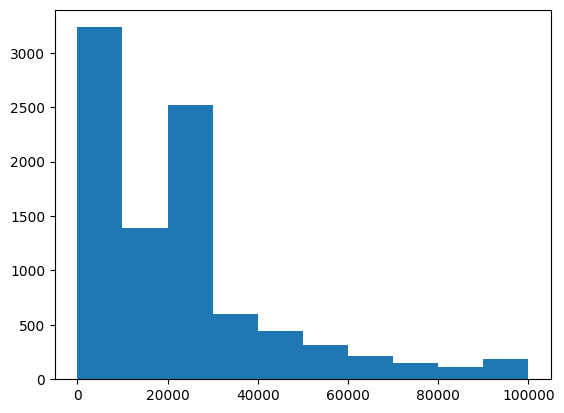

In [56]:
#hist of size
plt.hist(inp1["Size"])
plt.show()

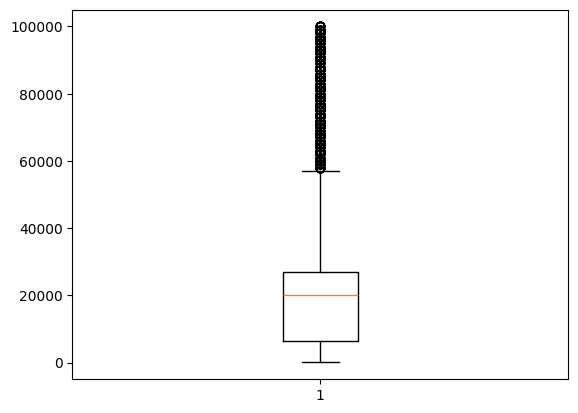

In [57]:
#hist of size
plt.boxplot(inp1["Size"])
plt.show()

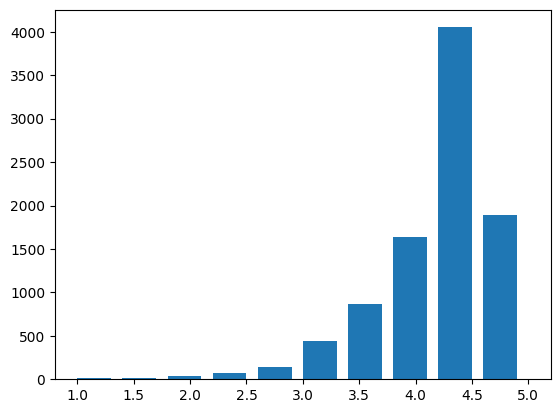

In [58]:
import matplotlib.pyplot as plt
plt.hist(inp1.Rating,width = 0.3)
plt.show()

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [59]:
#import the necessary libraries

import warnings 
warnings.filterwarnings("ignore")



#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

<Axes: xlabel='Rating', ylabel='Density'>

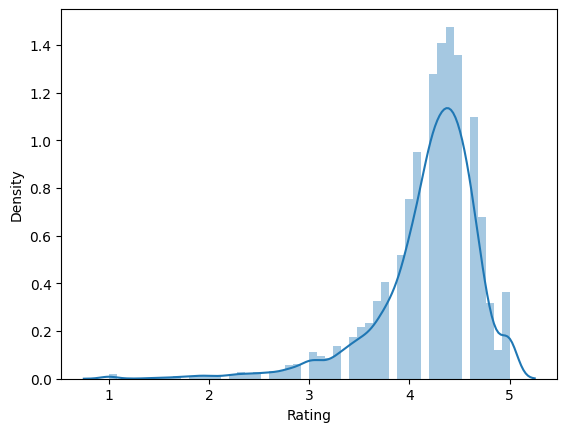

In [60]:
#Create a distribution plot for rating

import seaborn as sns

sns.distplot(inp1.Rating)  # vertical=True  ,kde=False

<Axes: xlabel='Rating', ylabel='Density'>

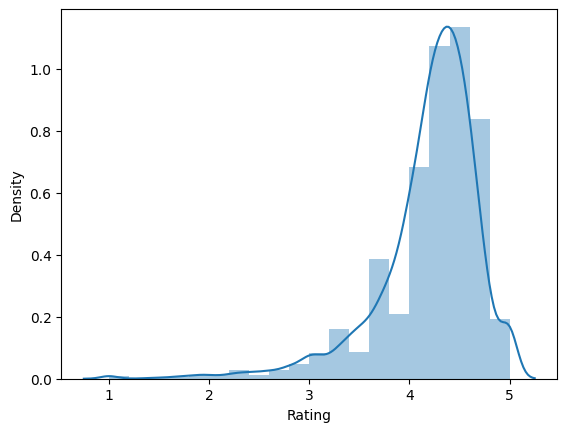

In [61]:
#Change the number of bins

sns.distplot(inp1.Rating,bins=20)  


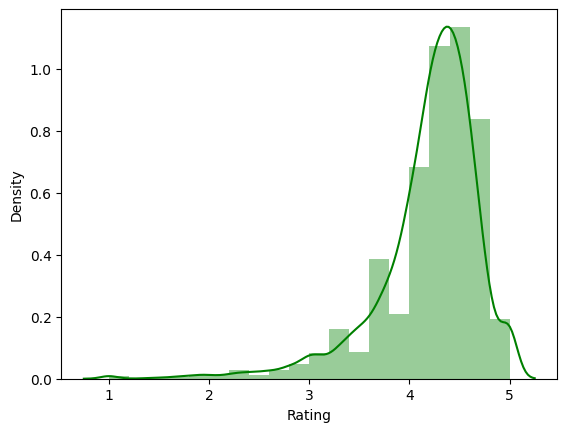

In [62]:
#Change the colour of bins to green
sns.distplot(inp1.Rating,bins=20,color='g')  
plt.show()

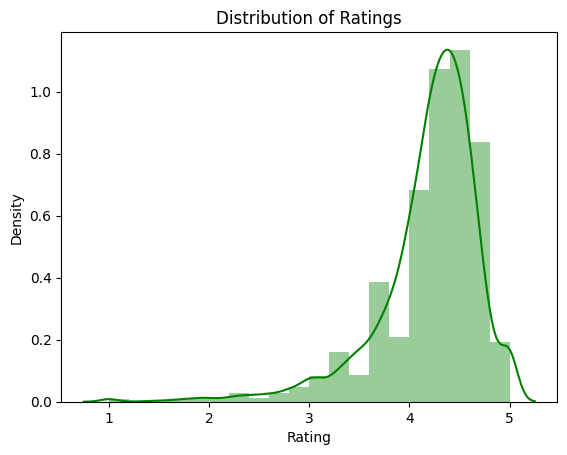

In [63]:
#Apply matplotlib functionalities
sns.distplot(inp1.Rating,bins=20,color='g')  
plt.title("Distribution of Ratings",fontsize=12)
plt.show()


#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

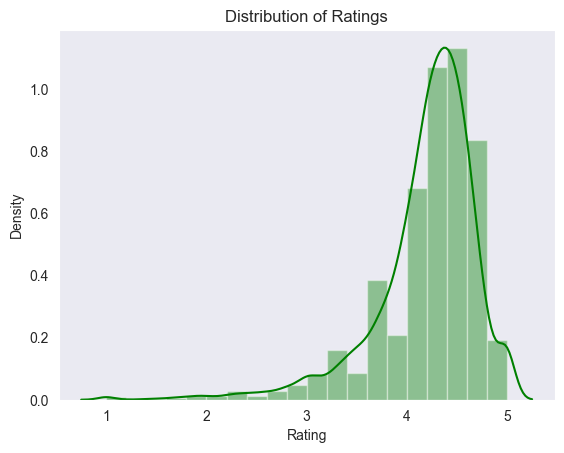

In [64]:
#Check all the styling options
sns.set_style("dark")
sns.distplot(inp1.Rating,bins=20,color='g')  
plt.title("Distribution of Ratings",fontsize=12)
plt.show()

In [65]:
#Change the number of bins to 20
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

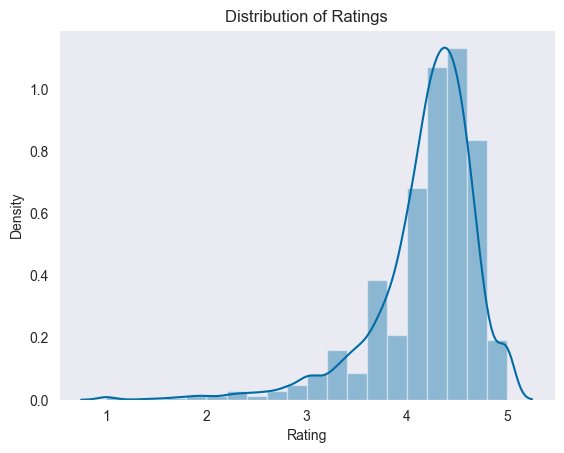

In [66]:
plt.style.use("tableau-colorblind10")
sns.distplot(inp1.Rating,bins=20)  
plt.title("Distribution of Ratings",fontsize=12)
plt.show()

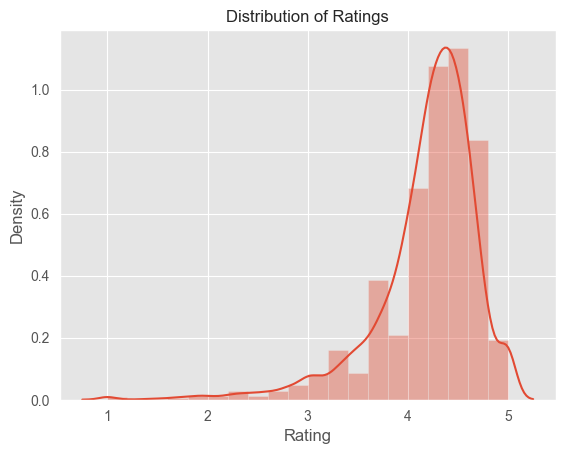

In [67]:
plt.style.use("ggplot")
sns.distplot(inp1.Rating,bins=20)  
plt.title("Distribution of Ratings",fontsize=12)
plt.show()

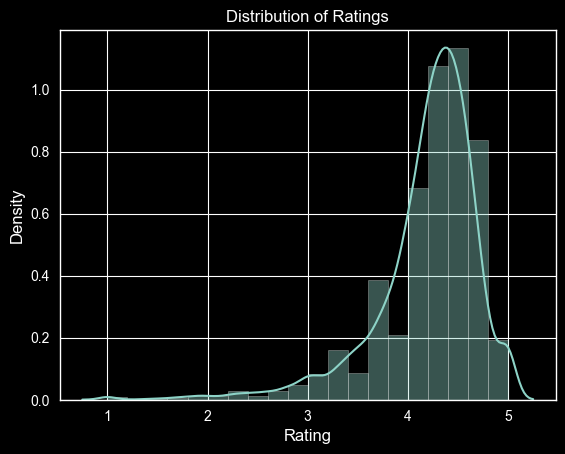

In [68]:
plt.style.use("dark_background")
sns.distplot(inp1.Rating,bins=20)  
plt.title("Distribution of Ratings",fontsize=12)
plt.show()

In [69]:

plt.style.use("default") # resetting style to default 
#resetting settings to inline 
%matplotlib inline 

In [70]:
""" In the earlier visualisations, you’re dealing only with numeric variables. Now you’ll step into analysing the categorical variables and see how the Ratings vary across each of them. 
Note that in the case of categorical variables, you need to use aggregates or measures like sum, average and median to plot the visualisations.
And then use plots like a bar chart or pie chart to portray those relationships. They are as follows: """

' In the earlier visualisations, you’re dealing only with numeric variables. Now you’ll step into analysing the categorical variables and see how the Ratings vary across each of them. \nNote that in the case of categorical variables, you need to use aggregates or measures like sum, average and median to plot the visualisations.\nAnd then use plots like a bar chart or pie chart to portray those relationships. They are as follows: '

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [71]:
#Analyse the Content Rating column
inp1["Content Rating"].value_counts()

Content Rating
Everyone           7286
Teen               1055
Mature 17+          458
Everyone 10+        374
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [72]:
#Remove the rows with values which are less represented 


In [73]:
#Reset the index


In [74]:
#Check the apps belonging to different categories of Content Rating 


In [75]:
#Plot a pie chart



In [76]:
#Plot a bar chart


In [77]:
#Question - Plot a bar plot for checking the 4th highest Android version type


#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

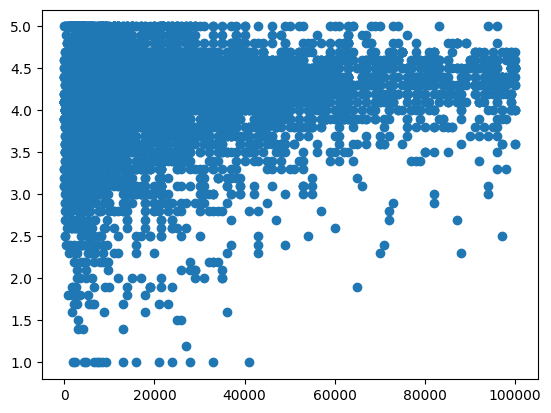

In [78]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
#Analyse the Content Rating column
#size vs rating

import matplotlib.pyplot as plt

plt.scatter(inp1.Size, inp1.Rating)
plt.show()

In [79]:
### Plot the same thing now using a jointplot
sns.set_style('white')
inp1.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9177, dtype: float64

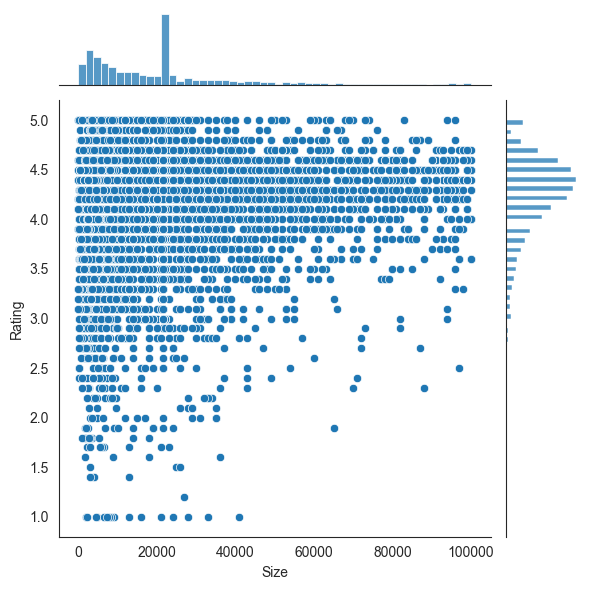

In [80]:
## Plot a jointplot for Price and Rating 
# 
# #we have seen the heavyer the app is rating is more 
sns.jointplot(data=inp1,x=inp1.Size, y=inp1.Rating)
plt.show()

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

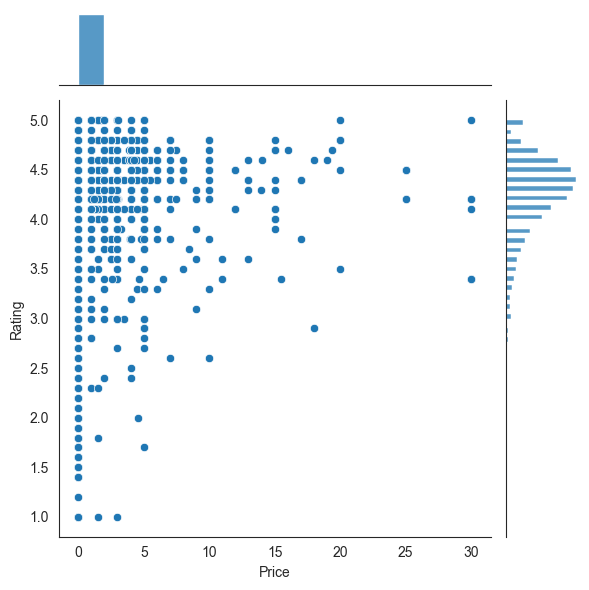

In [81]:
##Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(data=inp1,x=inp1.Price, y=inp1.Rating)
plt.show()


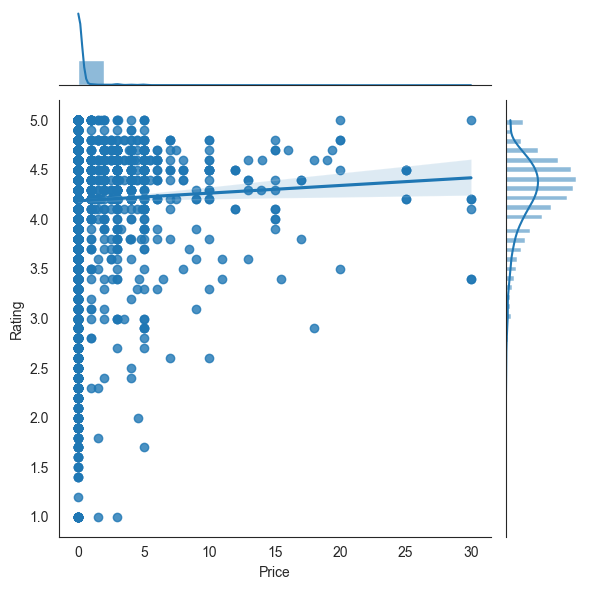

In [82]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps. We are plotting regration plot to analyze this.
sns.jointplot(data=inp1,x=inp1.Price, y=inp1.Rating , kind='reg')
plt.show()

#in below diagram we are observing positive slope on line which tell us there is a positive corelation of rating with price. 
#if price goes high rating set to g high as well.

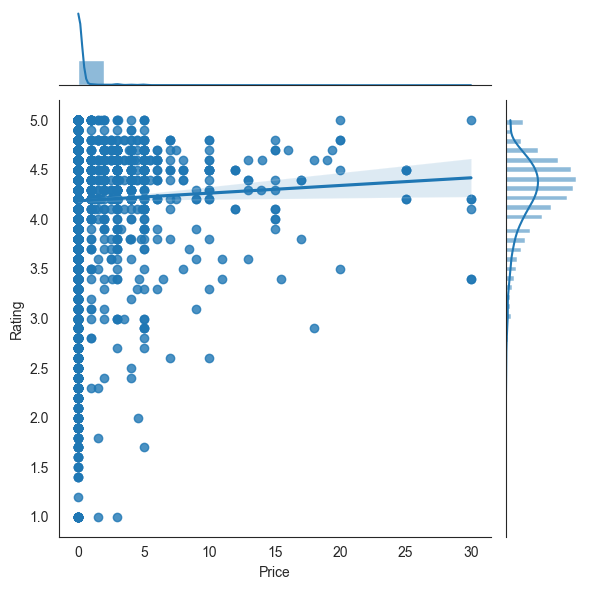

In [177]:
sns.jointplot(data=inp1[inp1["Price"]>0],x=inp1.Price, y=inp1.Rating , kind='reg')
plt.show()

**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

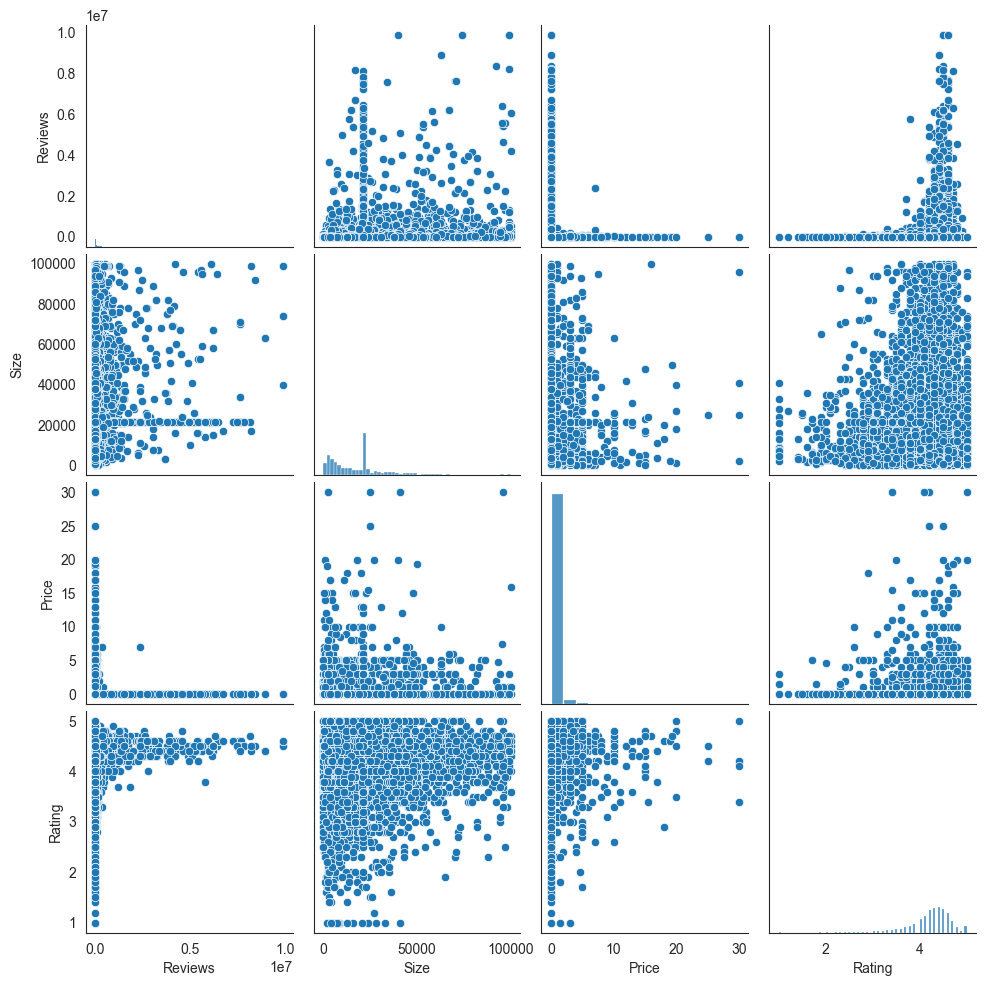

In [83]:
## Create a pair plot for Reviews, Size, Price and Rating

sns.pairplot(inp1[["Reviews","Size","Price","Rating"]])
plt.show()

**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

<Axes: xlabel='Content Rating'>

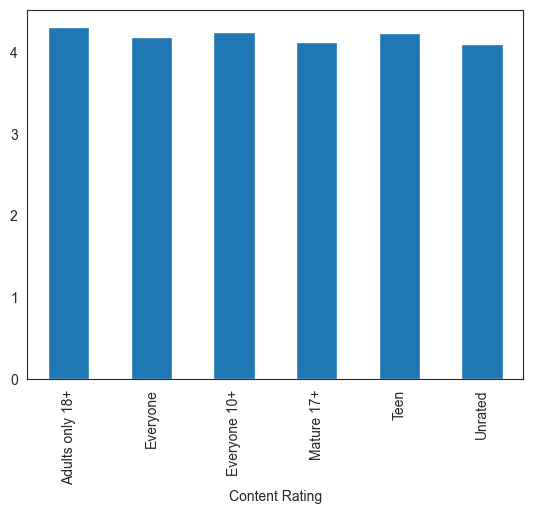

In [84]:
##Plot a bar plot of Content Rating vs Average Rating  , plotting avg rating for each category
# ## helps to check association between numerical vs charecter feature

inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()


<Axes: xlabel='Content Rating'>

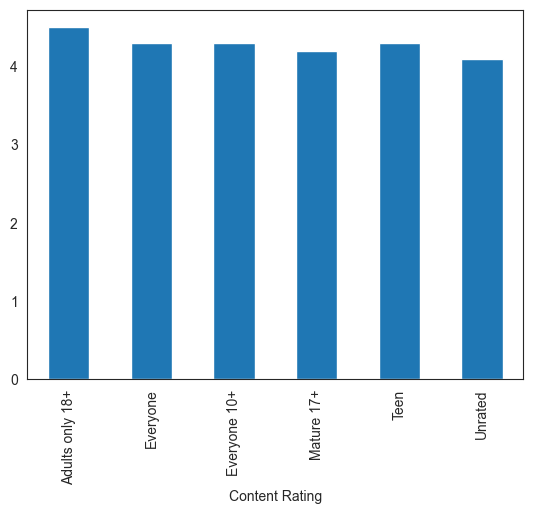

In [85]:
##Plot the bar plot again with Median Rating
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()


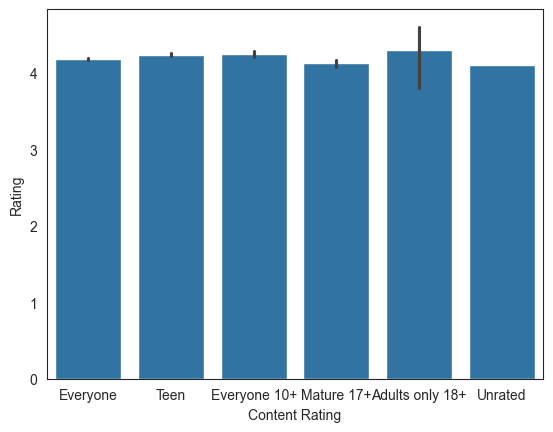

In [86]:
##Plot the above bar plot using the estimator parameter
sns.barplot(data=inp1,x="Content Rating",y="Rating") # This is average rating 
plt.show()


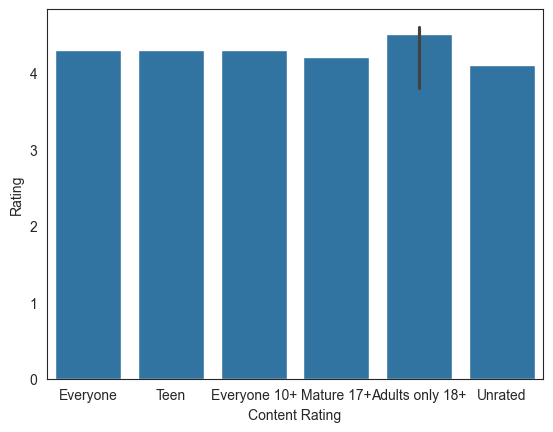

In [87]:
##Plot the above bar plot using the estimator parameter
sns.barplot(data=inp1,x="Content Rating",y="Rating",estimator=np.median) # This is average rating 
plt.show()

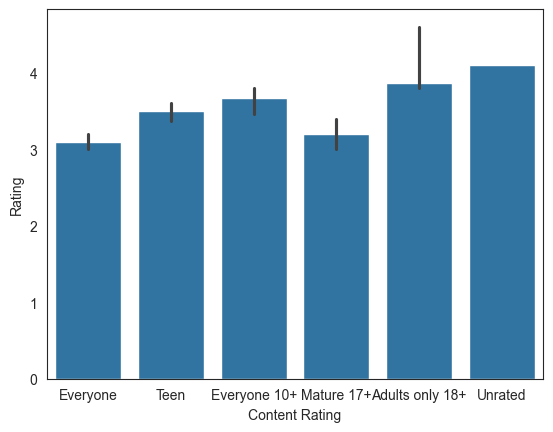

In [88]:
##Plot the bar plot with only the 5th percentile of Ratings this is essentiall lower quantile

sns.barplot(data=inp1,x="Content Rating",y="Rating",estimator=lambda x: np.quantile(x,0.05)) # This is average rating 
plt.show()

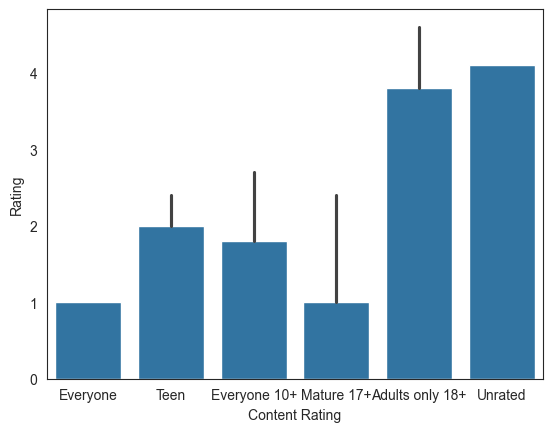

In [112]:
##Question - Plot the bar plot with the minimum Rating
##Plot the bar plot with only the 5th percentile of Ratings this is essentiall lower quantile

sns.barplot(data=inp1,x="Content Rating",y="Rating",estimator=np.min) # This is average rating 
plt.show()

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




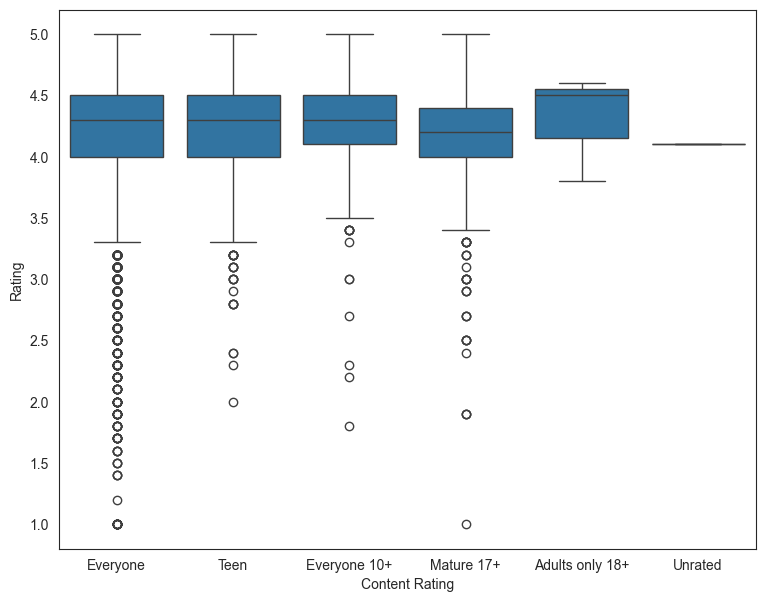

In [121]:
##Plot a box plot of Rating vs Content Rating
plt.figure(figsize=[9,7])
sns.boxplot(x=inp1['Content Rating'],y=inp1.Rating)
plt.show()

In [130]:
inp1["Genres"].value_counts()

Genres
Tools                          718
Entertainment                  527
Education                      468
Action                         350
Medical                        344
                              ... 
Health & Fitness;Education       1
Music & Audio;Music & Video      1
Arcade;Pretend Play              1
Entertainment;Education          1
Strategy;Creativity              1
Name: count, Length: 115, dtype: int64

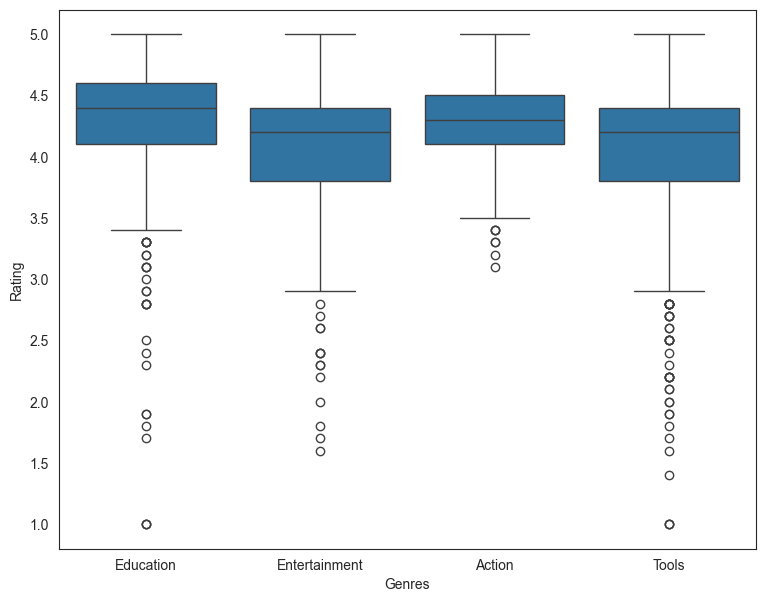

In [139]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
plt.figure(figsize=[9,7])
flt1=inp1[inp1['Genres'].isin(["Tools","Entertainment","Education","Action"])]
sns.boxplot(x=flt1['Genres'],y=flt1.Rating)
plt.show()

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [152]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut ################
inp1=inp1[~(inp1["Content Rating"].isin(["Unrated","Adults only 18+"]))]
inp1['Size_Bucket'] = pd.qcut(inp1.Size,[0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])
inp1.head()

""" Percentile Range 	Binned Category
(0,20]	Very Low (VL)
(20,40]	Low(L)
(40,60]	Medium (M)
(60,80]	High(H)
(80,100]	 Very High(VH) """                     


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [153]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating")


Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.112642,4.166794,4.246220,4.163227,4.218347
Everyone 10+,4.189474,4.223333,4.247788,4.226761,4.251773
Mature 17+,4.112281,4.085227,4.075510,4.174603,4.194175
Teen,4.200952,4.233548,4.205740,4.228462,4.274850


In [154]:
##Change the aggregation to median
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.2,4.30,4.3,4.30,4.3
Everyone 10+,4.1,4.35,4.3,4.30,4.3
Mature 17+,4.3,4.20,4.2,4.20,4.2
Teen,4.3,4.30,4.3,4.25,4.3


In [96]:
##Change the aggregation to 20th percentile because the median value does not reveal actual picture 
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=np.median)

In [155]:
##Store the pivot table in a separate variable
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x: np.quantile(x,0.2)) ##This accepets a array of rating form each caontent rating category and return 20% of it 


Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.98
Everyone 10+,3.86,3.98,4.1,4.0,4.00
Mature 17+,3.42,3.70,3.9,3.9,4.00
Teen,3.80,3.90,3.9,4.0,4.00


In [156]:
##Store the pivot table in a separate variable
res=pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x: np.quantile(x,0.2)) ##This accepets a array of rating form each caontent rating category and return 20% of it 


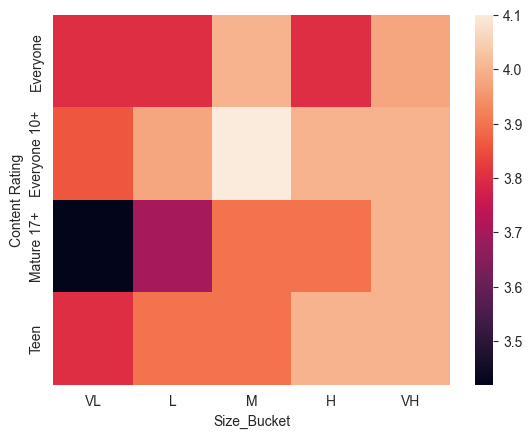

In [158]:
##Plot a heat map
sns.heatmap(res)
plt.show()


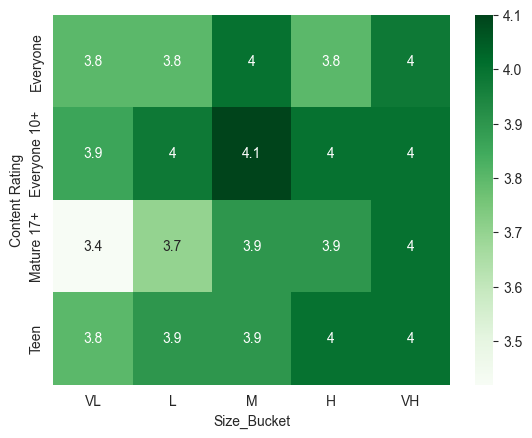

In [162]:
##Apply customisations
sns.heatmap(res,cmap="Greens",annot=True)
plt.show()
# this reveals everyone 10+ rating has overall good ratings

In [164]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating


0        1
1        1
2        8
3        6
4        6
        ..
10834    6
10836    7
10837    7
10839    1
10840    7
Name: Last Updated, Length: 9173, dtype: int32

### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [165]:
## Extract the month from the Last Updated Date
inp1['Updated_month'] = pd.to_datetime(inp1["Last Updated"]).dt.month


In [166]:
## Find the average Rating across all the months
inp1.groupby(['Updated_month'])['Rating'].mean()


Updated_month
1     4.143735
2     4.094048
3     4.110989
4     4.154910
5     4.161818
6     4.181502
7     4.246140
8     4.292867
9     4.042636
10    4.019687
11    4.112338
12    4.071726
Name: Rating, dtype: float64

<Axes: xlabel='Updated_month'>

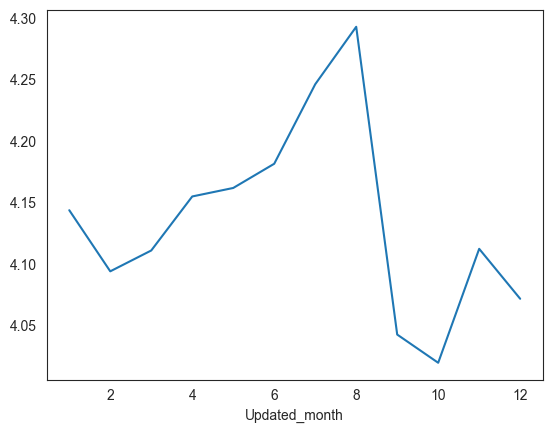

In [167]:
## Plot a line graph
inp1.groupby(['Updated_month'])['Rating'].mean().plot()
""" 
Though not quite significant, there is indeed some improvement in the ratings during the months of July-August. 
Note that, here, we have assumed the Last Updated month to be the one in which all the reviews and ratings are coming from the users. """


#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [169]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data=inp1,values="Installs",index="Updated_month",columns="Content Rating",aggfunc=sum)


Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated_month,,,,
1,1025387390,105282000,9701210,44159010
2,945372005,19821000,13021500,39597710
3,1045365520,30322510,9111100,99850310
4,2593371180,23300000,5259000,271619410
5,2931067800,128173500,110140100,562689600
6,3857170505,967727100,155257200,505716600
7,20391109680,2726556000,1239491910,5983556800
8,13690943320,215821000,2462981700,4497855650
9,410340410,24931100,2201010,22483100


In [170]:
##Store the table in a separate variable
monthly = pd.pivot_table(data=inp1,values="Installs",index="Updated_month",columns="Content Rating",aggfunc=sum)

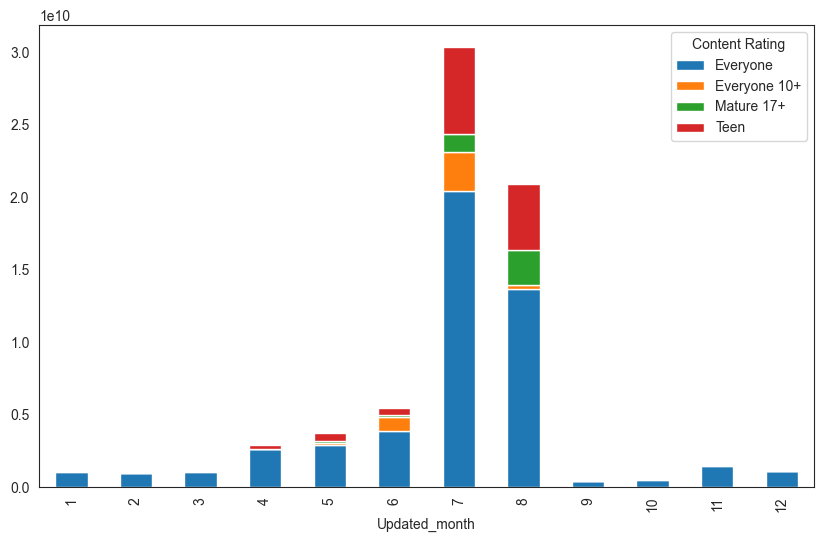

In [172]:
##Plot the stacked bar chart.
monthly.plot(kind="bar",stacked="True",figsize=[10,6])
plt.show()

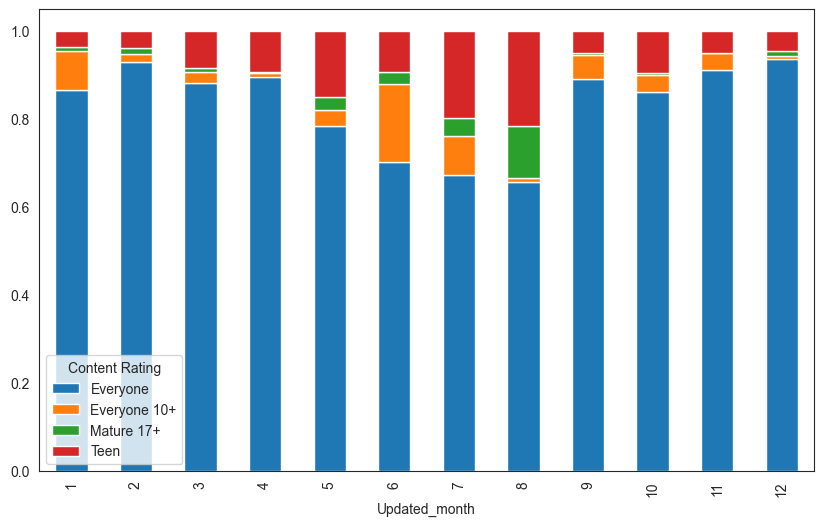

In [174]:
##Plot the stacked bar chart again wrt to the proportions.

#### This reveals During US Summer vacation Teens are downloading most of the apps and providing extream rating which is very good or very bad

monthly_perc = monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x: x/x.sum(),axis=1)
monthly_perc.plot(kind="bar",stacked="True",figsize=[10,6])
plt.show()

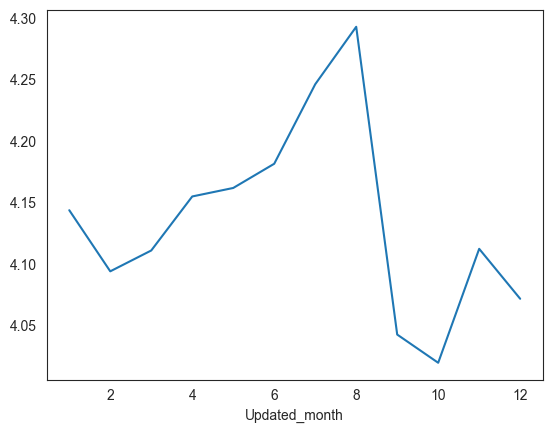

In [190]:
## Plot a line graph with rating time chart
inp1.groupby(['Updated_month'])['Rating'].mean().plot()
plt.show()

In [ ]:
""" Summary of case study:

First, you did a fair bit of data handling and cleaning - cleaning junk records, adding missing values, changing data types, remove outliers, etc.

When you analysed the ratings using the histogram, you saw that they are skewed towards higher ratings.

Using a bar chart, you saw that most of the apps belong to the Everyone category.

You also observed a weak trend between the ratings and the size of the app, using a scatter-plot. You also briefly forayed to reg plots to understand its nuances.

Using a pair-plot, you were able to see multiple scatter plots and draw several inferences, for example, price and rating having very weak trend, reviews and price being inversely related and so on.

After that, you utilised estimator functions along with bar plots as well as box plots to observe the spread of ratings across the different Content Rating Categories. Here, your main observation was that Everyone category has a lot of apps having very low ratings.

Finally, you created a heat map comparing the ratings across different Reviews and Content Rating buckets. """

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [186]:
#Install plotly
#pip install plotly
#pip install --upgrade nbformat

SyntaxError: invalid syntax (287660212.py, line 3)

In [179]:
#Take the table you want to plot in a separate variable
res = inp1.groupby(["Updated_month"])[['Rating']].mean()
res.reset_index(inplace=True)

In [184]:
#Import the plotly libraries
import plotly.express as px
res

,Updated_month,Rating
0,1,4.143735
1,2,4.094048
2,3,4.110989
3,4,4.154910
4,5,4.161818
5,6,4.181502
6,7,4.246140
7,8,4.292867
8,9,4.042636
9,10,4.019687


In [189]:
#Prepare the plot

fig = px.line(res, x="Updated_month",y="Rating",title="Montly average rating")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed